### Housing Price Prediction

In [157]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [158]:
# Loading the dataset
df= pd.read_csv('Housing.csv')

In [159]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data cleaning and EDA

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [161]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [162]:
df.duplicated().sum()

0

In [163]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


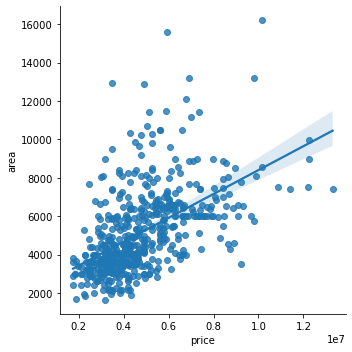

In [164]:
sns.lmplot(data=df, x ='price', y= 'area')

There's a linear relationship between the price and the area of the house

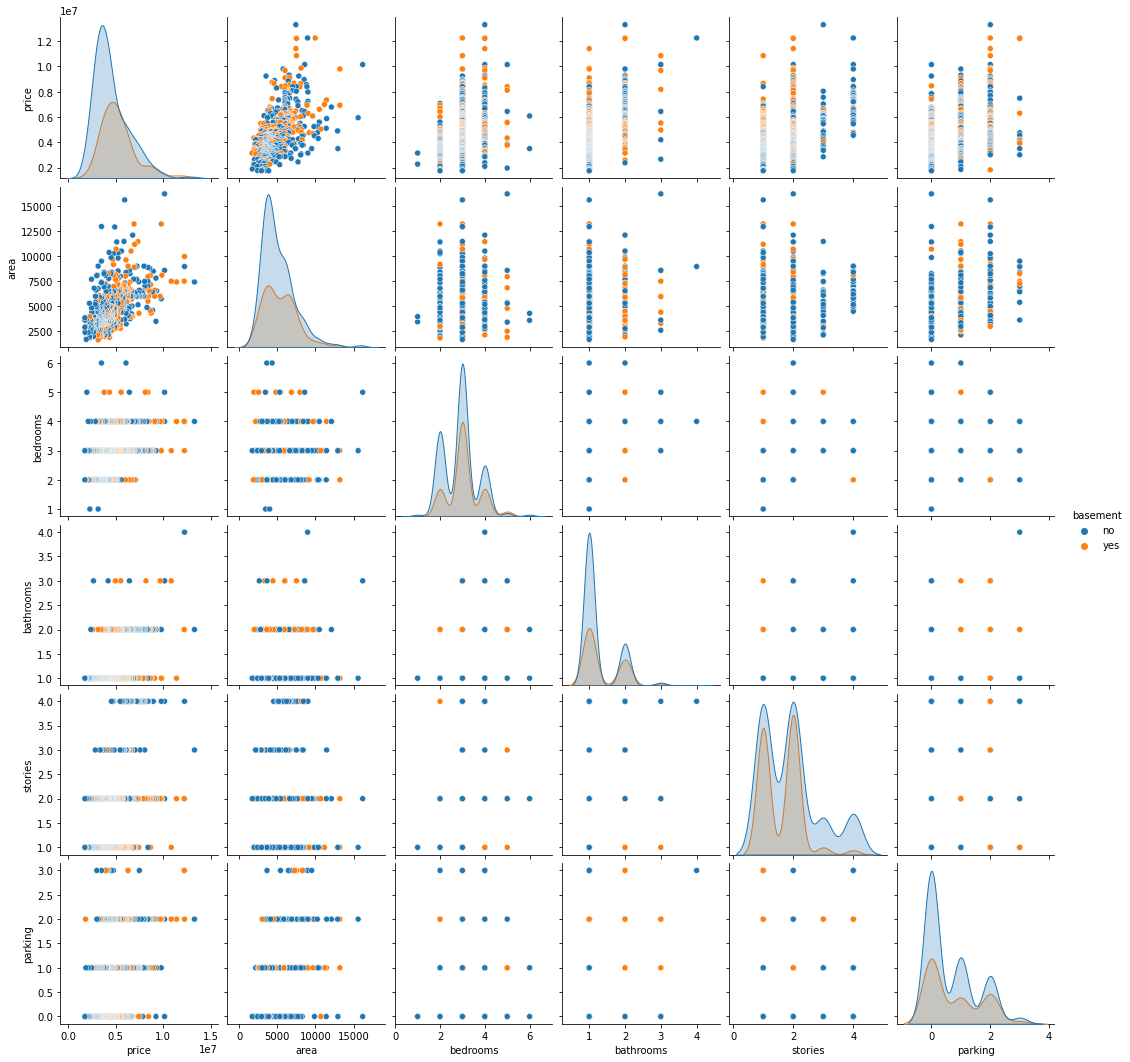

In [165]:
sns.pairplot(df, hue='basement')

In [166]:
round(df.corr(),2)

,price,area,bedrooms,bathrooms,stories,parking
price,1.00,0.54,0.37,0.52,0.42,0.38
area,0.54,1.00,0.15,0.19,0.08,0.35
bedrooms,0.37,0.15,1.00,0.37,0.41,0.14
bathrooms,0.52,0.19,0.37,1.00,0.33,0.18
stories,0.42,0.08,0.41,0.33,1.00,0.05
parking,0.38,0.35,0.14,0.18,0.05,1.00


There is a moderately positive correlation between price and the area of the house, as well as the price and bathrooms

#### Getting the Features and the Target variables

In [167]:
X = df.drop(columns='price', axis=1)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [168]:
y= df['price']
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### Performing one hot encoding on the categorical variables

In [169]:
enc = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False).set_output(transform= 'pandas')

In [170]:
enc_transform = enc.fit_transform(df[['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning',
                                      'prefarea','furnishingstatus']])
enc_transform.head()

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [171]:
new_df = pd.concat([df, enc_transform], axis= 1).drop(columns= ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                                       'airconditioning', 'prefarea','furnishingstatus'])

In [172]:
new_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

#### Feature Scaling 

In [173]:
# Scaling the price and area of the house using log to improve model performance
new_df['price']= np.log(df['price'])
new_df['area']= np.log(df['area'])
new_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,16.403275,8.911934,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,16.321036,9.100526,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,16.321036,9.206332,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,16.318175,8.922658,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,16.250001,8.911934,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [174]:
X = new_df.drop(columns='price', axis=1)
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8.911934,4,2,3,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,9.100526,4,4,4,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,9.206332,3,2,2,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,8.922658,4,2,2,3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8.911934,4,1,2,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [175]:
y = new_df['price']
y.head()

0    16.403275
1    16.321036
2    16.321036
3    16.318175
4    16.250001
Name: price, dtype: float64

#### Train, test splitting of data

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [177]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(545, 20) (436, 20) (109, 20)
(545,) (436,) (109,)


### Model Training

#### Linear Regression Model

In [178]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [179]:
training_data_predictions= model.predict(X_train)

In [180]:
# Evaluation based on training data
# R squared error
score_1 = r2_score(y_train, training_data_predictions)

# Mean squared error
score_2 = mean_squared_error(y_train, training_data_predictions)

# Mean absolute error
score_3 = mean_absolute_error(y_train, training_data_predictions)

print('Model Evaluation for training data in the Linear Regression Model')
print()
print('R squared error for training data:', score_1)
print('Mean squared error for training data:', score_2)
print('Mean absolute error for training data:',score_3)

Model Evaluation for training data in the Linear Regression Model

R squared error for training data: 0.7150052069462811
Mean squared error for training data: 0.035444458035549783
Mean absolute error for training data: 0.14496155599677574


In [181]:
test_data_predictions= model.predict(X_test)

In [182]:
# Evaluation based on test data
# R squared error
score_4 = r2_score(y_test, test_data_predictions)

# Mean squared error
score_5 = mean_squared_error(y_test, test_data_predictions)

# Mean absolute error
score_6 = mean_absolute_error(y_test, test_data_predictions)

print('Model Evaluation for test data in the Linear Regression Model')
print()
print('R squared error for test data:', score_4)
print('Mean squared error for test data:', score_5)
print('Mean absolute error for test data:',score_6)

Model Evaluation for test data in the Linear Regression Model

R squared error for test data: 0.6780434077109089
Mean squared error for test data: 0.06216619042625433
Mean absolute error for test data: 0.19989104673175506


Text(0.5, 1.0, 'Predicted Vs Actual (Linear Regression)')

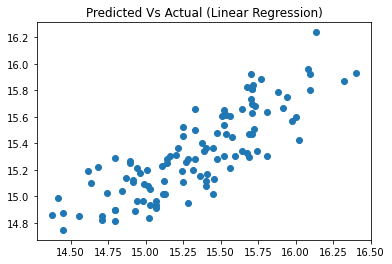

In [183]:
# Showing how far off the predicitions are from the actaul values
plt.scatter(y_test, test_data_predictions)
plt.title('Predicted Vs Actual (Linear Regression)')

### XGBoost Regressor Model

In [184]:
model_2 = XGBRegressor()

In [185]:
model_2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [186]:
train2_pred = model_2.predict(X_train)

In [187]:
# Model Evaluation based on training data
# R squared error
score_7 = r2_score(y_train, train2_pred)

# Mean squared error
score_8 = mean_squared_error(y_train, train2_pred)

# Mean absolute error
score_9 = mean_absolute_error(y_train, train2_pred)

print('Model Evaluation for training data in the XGBoost Regressor Model')
print()
print('R squared error for training data:', score_7)
print('Mean squared error for training data:', score_8)
print('Mean absolute error for training data:',score_9)

Model Evaluation for training data in the XGBoost Regressor Model

R squared error for training data: 0.9925486851778479
Mean squared error for training data: 0.0009267110205541857
Mean absolute error for training data: 0.01384008514166514


In [188]:
test2_pred = model_2.predict(X_test)

In [189]:
# Model Evaluation based on test data
# R squared error
score_10 = r2_score(y_test, test2_pred)

# Mean squared error
score_11 = mean_squared_error(y_test, test2_pred)

# Mean absolute error
score_12 = mean_absolute_error(y_test, test2_pred)

print('Model Evaluation for test data in the XGBoost Regressor Model')
print()
print('R squared error for test data:', score_10)
print('Mean squared error for test data:', score_11)
print('Mean absolute error for test data:',score_12)

Model Evaluation for test data in the XGBoost Regressor Model

R squared error for test data: 0.6288917433363352
Mean squared error for test data: 0.07165682301604588
Mean absolute error for test data: 0.2084045333652573


Text(0.5, 1.0, 'Predicted Vs Actual (XGBoost)')

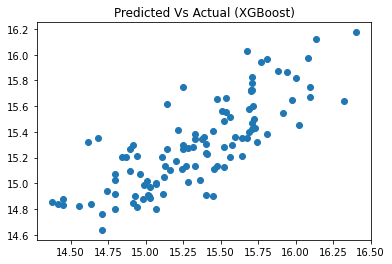

In [190]:
plt.scatter(y_test, test2_pred)
plt.title('Predicted Vs Actual (XGBoost)')

### Gradient Boosting Regressor Model

In [191]:
model_3 = GradientBoostingRegressor()
model_3.fit(X_train, y_train)

GradientBoostingRegressor()

In [192]:
train3= model.predict(X_train)

In [193]:
# Model evaluation based on train data
# R squared error
score_13 = r2_score(y_train, train3)

# Mean squared error
score_14 = mean_squared_error(y_train, train3)

# Mean absolute error
score_15 = mean_absolute_error(y_train, train3)

print('Model Evaluation for training data in the Gradient Boosting Regressor Model')
print()
print('R squared error for training data:', score_13)
print('Mean squared error for training data:', score_14)
print('Mean absolute error for training data:',score_15)

Model Evaluation for training data in the Gradient Boosting Regressor Model

R squared error for training data: 0.7150052069462811
Mean squared error for training data: 0.035444458035549783
Mean absolute error for training data: 0.14496155599677574


In [194]:
test3 =  model.predict(X_test)

In [195]:
# Model evaluation based on test data
# R squared error
score_16 = r2_score(y_test, test3)

# Mean squared error
score_17 = mean_squared_error(y_test, test3)

# Mean absolute error
score_18 = mean_absolute_error(y_test, test3)

print('Model Evaluation for test data in the Gradient Boosting Regressor Model')
print()
print('R squared error for test data:', score_16)
print('Mean squared error for test data:', score_17)
print('Mean absolute error for test data:',score_18)

Model Evaluation for test data in the Gradient Boosting Regressor Model

R squared error for test data: 0.6780434077109089
Mean squared error for test data: 0.06216619042625433
Mean absolute error for test data: 0.19989104673175506


Text(0.5, 1.0, 'Predicted Vs Actual (Gradient Boosting)')

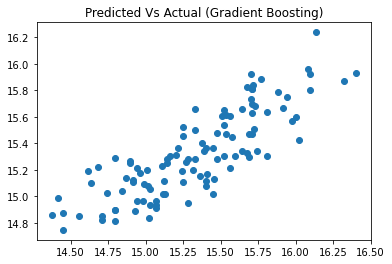

In [196]:
plt.scatter(y_test, test3)
plt.title('Predicted Vs Actual (Gradient Boosting)')

### Visualizing the Models fit

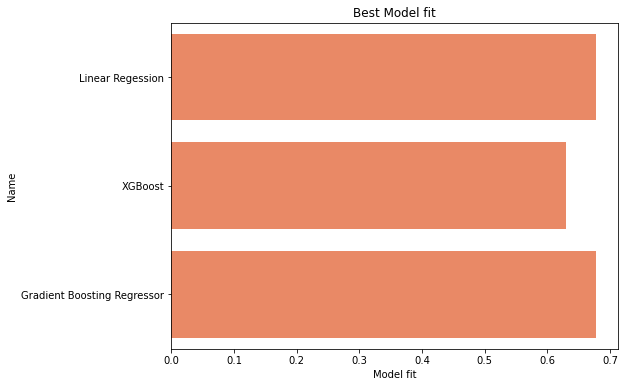

In [197]:
r2_visualization = pd.DataFrame({'Name': ['Linear Regession', 'XGBoost', 'Gradient Boosting Regressor'],
                                'Model fit':[ 0.6780434077109089,0.6288917433363352,0.6780434077109089]})

plt.figure(figsize=(8,6))
plt.title('Best Model fit')
sns.barplot(x= 'Model fit', y= 'Name', data = r2_visualization, color = 'coral')
plt.show()

In [198]:
# Returning the predictions back to the original form after feature scaling
predictions_original_scale = np.exp(train2_pred)